In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import lime
import lime.lime_tabular
import warnings
warnings.simplefilter('ignore')
from docx import Document
from docx.shared import Inches

In [8]:
fao_data = pd.read_csv("~/Documents/Kaleb-Bsc thesis/Crop yield and agricultural practices/datasets/latest0705.csv", index_col='Unnamed: 0')

fao_data

,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Plant Growth Regulators-1,Plant Growth Regulators-2,Rodenticides – Other-1,Rodenticides – Other-2,Herbicides – Bipiridils-1,Herbicides – Bipiridils-2,Herbicides – Sulfonyl ureas-1,Herbicides – Sulfonyl ureas-2,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2
1990-01-01,0.0,0.0,0.0,Apples,26.3272,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Apricots,2.5781,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Cherries,5.0828,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Currants,7.0383,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Gooseberries,6.8081,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,0.0,0.0,0.0,Mixed grain,-5.8863,0.0,0.0,0.0,0.0,0.0,...,0.0,144.0,0.0,6.0,0.0,-84.0,0.0,4.0,0.1,0.1
2020-01-01,0.0,0.0,0.0,Oats,0.8941,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1
2020-01-01,0.0,0.0,0.0,Rye,0.9290,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1
2020-01-01,0.0,0.0,0.0,Triticale,0.4421,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1


In [9]:
cat_names = fao_data['Category'].unique()
cat_names

array(['Fruits and Nuts', 'Vegetables and Legumes', 'Cereals'],
      dtype=object)

Intercept 17.50238022253925
Prediction_local [10.95859191]
Right: 8.086736807266577


,Features_Fruits and Nuts,Coeffcients (SVR)_Fruits and Nuts
0,Fall <= 0.00,2.859255
1,Fung & Bact – Inorganics <= 0.50,-1.954584
2,Rodenticides – Other <= 0.50,-1.791629
3,Herbicides – Other <= 0.49,-1.474159
4,Herbicides – Carbamates <= 0.51,-1.298131
5,Herbicides – Amides <= 0.48,-1.239119
6,"Fung & Bact – Triazoles, diazoles <= 0.50",-1.065071
7,Herbicides – Phenoxy hormone products <= 0.52,1.017584
8,"Fung & Bact – Diazines, morpholines-2 <= 0.51",-0.799708
9,"Fung & Bact – Diazines, morpholines <= 0.51",-0.798227


Intercept -4.137057236897611
Prediction_local [47.89289938]
Right: 77.44710953862945


,Features_Vegetables and Legumes,Coeffcients (SVR)_Vegetables and Legumes
0,Summer > 0.00,20.395608
1,Year-Round <= 0.00,11.506678
2,0.04 < Yield(tonnes/ha)-2 <= 0.20,3.456523
3,Fung & Bact – Benzimidazoles <= 0.51,3.110706
4,Spring <= 0.00,2.951208
5,Rodenticides – Other-1 <= 0.50,2.415562
6,Yield(tonnes/ha)-1 > 0.38,2.295531
7,"Fung & Bact – Triazoles, diazoles-2 <= 0.50",2.024258
8,Rodenticides – Other <= 0.50,2.013656
9,Insecticides – Pyrethroids-1 <= 0.50,1.860226


Intercept 0.02504359239266185
Prediction_local [-0.28454245]
Right: 1.2654798207805853


,Features_Cereals,Coeffcients (SVR)_Cereals
0,Summer <= 0.00,-2.134308
1,Herbicides – Other-2 <= 0.49,0.324974
2,Rodenticides – Other-2 <= 0.50,0.311318
3,Fung & Bact – Inorganics-2 <= 0.50,0.279158
4,Herbicides – Amides-2 <= 0.48,0.262652
5,Herbicides – Phenoxy hormone products-1 <= 0.53,0.246470
6,"Fung & Bact – Triazoles, diazoles-2 <= 0.50",0.211408
7,Insecticides – Pyrethroids-2 <= 0.50,0.191003
8,Fung & Bact – Dithiocarbamates-2 <= 0.51,-0.182677
9,Fung & Bact – Other-2 <= 0.50,0.180418


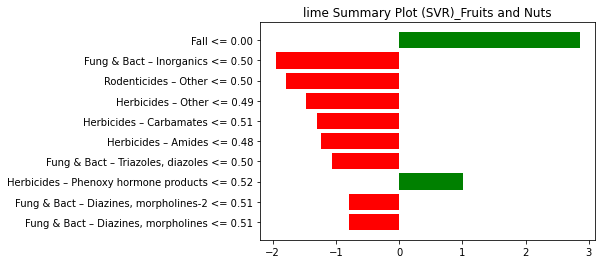

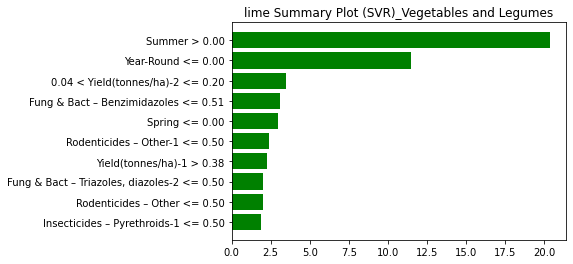

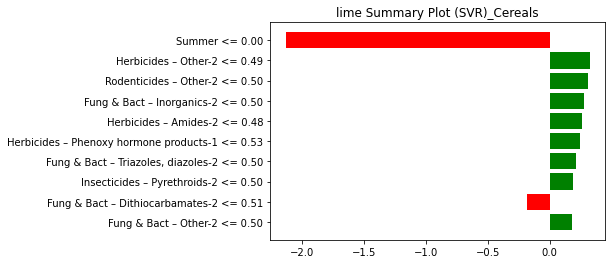

In [11]:
doc = Document()
scaler = MinMaxScaler()
for cat in cat_names:
    crop_df = fao_data[fao_data['Category'] == cat]
    encoded_df = pd.get_dummies(crop_df[["Crop_season"]], prefix='', prefix_sep='')
    encoded_df = encoded_df.drop(encoded_df.columns[-2], axis=1)
    y = crop_df[['Yield(tonnes/ha)']]
    x = crop_df.drop(['Yield(tonnes/ha)', "Item", "Category", "Crop_season"], axis=1)
    x = pd.concat([x, encoded_df], axis=1)
    mean = x.mean()
    std = x.std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    x = x.clip(lower_bound, upper_bound, axis=1)
    x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
   
  
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
    regressor = SVR(kernel='rbf', C = 100, epsilon= 0.5)
    regressor.fit(x_train, y_train)


    #prediction of new value
    y_pred = regressor.predict(x_test)
    explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=pd.DataFrame(x_test).columns, 
                    class_names=['Yield(tonnes/ha)'], verbose=True, mode='regression')
    exp = explainer.explain_instance(pd.DataFrame(x_test).iloc[-1], 
     regressor.predict, num_features=10)
    exp_list = exp.as_list()
    exp_list = [(feat, abs(coeff)) for feat, coeff in exp_list] # add absolute value of coefficients
    exp_list.sort(key=lambda x: x[1], reverse=True)
    exp.as_pyplot_figure()
    plt.title("lime Summary Plot (SVR)_" + cat)
    display(pd.DataFrame(exp.as_list(),  columns=['Features_' + cat, 'Coeffcients (SVR)_' + cat]))

    
    # create a table for Lime results
    table = doc.add_table(rows=1, cols=2)
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Features_' + cat
    hdr_cells[1].text = 'Coefficients (SVR)_' + cat
    
    for feature, coefficient in exp.as_list():
        row_cells = table.add_row().cells
        row_cells[0].text = str(feature)
        row_cells[1].text = str(coefficient)

    # add a page break
    doc.add_page_break()

# save the Word document
doc.save('lime_results_SVR.docx')